## Lecture 2.8: Binary Logistic Regression in PyTorch

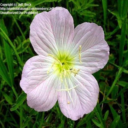

In [1]:
import torchvision
import torch
from PIL import Image
## Create a vector pf zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True))

def visualize_img(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())
visualize_img(train_dataset[1][0])


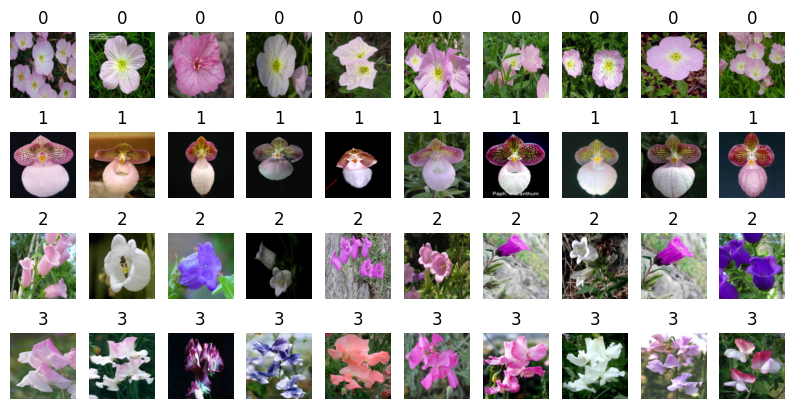

In [2]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(4, 10, figsize=(10, 5))
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_img(im))
    ax[i // 10, i % 10].set_title(l)
    ax[i // 10, i % 10].axis('off')

In [3]:
train_images = torch.stack([im for im, _ in train_dataset], dim=0)
train_labels = torch.tensor([label for _, label in train_dataset])

In [4]:
train_images_01 = train_images[train_labels <= 1]
train_labels_01 = train_labels[train_labels <= 1]

In [9]:
model = torch.nn.Linear(3 * 128 * 128, 1)
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0)

In [10]:
for epoch in range(100):
    # Compute the model output
    out = model(train_images_01.view(-1, 3 * 128 * 128))

    # Compute loss
    loss_val = loss(out.squeeze(), train_labels_01.float())

    # Compute gradient and update weights
    optimizer.zero_grad()
    loss_val.backward()
    optimizer.step()
    print(f'{epoch=} {loss_val.item()=}')

epoch=0 loss_val.item()=0.6566461324691772
epoch=1 loss_val.item()=0.5776597261428833
epoch=2 loss_val.item()=0.5165609121322632
epoch=3 loss_val.item()=0.4684280455112457
epoch=4 loss_val.item()=0.4296853542327881
epoch=5 loss_val.item()=0.3979048728942871
epoch=6 loss_val.item()=0.3713897168636322
epoch=7 loss_val.item()=0.3489229083061218
epoch=8 loss_val.item()=0.32960981130599976
epoch=9 loss_val.item()=0.3127872347831726
epoch=10 loss_val.item()=0.29796257615089417
epoch=11 loss_val.item()=0.28476765751838684
epoch=12 loss_val.item()=0.27292296290397644
epoch=13 loss_val.item()=0.26221126317977905
epoch=14 loss_val.item()=0.2524614930152893
epoch=15 loss_val.item()=0.2435363084077835
epoch=16 loss_val.item()=0.235324427485466
epoch=17 loss_val.item()=0.2277345210313797
epoch=18 loss_val.item()=0.22069081664085388
epoch=19 loss_val.item()=0.21413016319274902
epoch=20 loss_val.item()=0.20799894630908966
epoch=21 loss_val.item()=0.20225195586681366
epoch=22 loss_val.item()=0.1968501

In [11]:
test_images = torch.stack([im for im, _ in test_dataset], dim=0)
test_labels = torch.tensor([label for _, label in test_dataset])

In [12]:
test_images_01 = test_images[test_labels <= 1]
test_labels_01 = test_labels[test_labels <= 1]

In [16]:
pred_test = model(test_images_01.view(-1, 3 * 128 * 128))
print(((pred_test[:, 0] > 0).int() == test_labels_01).float().mean())

tensor(0.7167)
